In [1]:
import argparse

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import mxnet as mx
from mxnet import gluon, autograd, nd
from mxnet.gluon import nn

In [5]:
class Net(nn.Block):
    def __init__(self, act):
        super(Net, self).__init__()
        
        with self.name_scope():
            self.dense1 = nn.Dense(8)
            self.dense2 = nn.Dense(8)
            self.dense3 = nn.Dense(1)
            
        self.act = act
        
    def forward(self, x):
        x = self.act(self.dense1(x))
        x = self.act(self.dense2(x))
        x = self.dense3(x)
        return x

In [6]:
def train(net, low, high, batch_size, n_batch):
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})
    l2loss  = gluon.loss.L2Loss()
    
    moving_loss = None
    print_every = 1000
    
    for i in range(n_batch):
        x = np.random.uniform(low, high, size=(batch_size, 1))
        x = mx.nd.array(x, ctx=ctx)
        
        with autograd.record():
            y = net(x)
            loss = l2loss(x, y)
        
        loss.backward()
        trainer.step(batch_size)
        
        loss = mx.nd.mean(loss).asscalar()
        moving_loss = loss if moving_loss is None else moving_loss*0.98 + loss*0.02
        
        if i % print_every == 0:
            print("Batch: %d\tLoss: %.6f" % (i, moving_loss))

In [7]:
def evaluate(net, x):
    x = mx.nd.array(x, ctx=ctx)
    y = net(x)
    
    x, y = x.asnumpy().squeeze(), y.asnumpy().squeeze()
    return np.abs(x-y)

Train: ReLu 1/20
Batch: 0	Loss: 11.395258
Batch: 1000	Loss: 0.509278
Batch: 2000	Loss: 0.237789
Batch: 3000	Loss: 0.120268
Batch: 4000	Loss: 0.223974
Train: ReLu 2/20
Batch: 0	Loss: 43.634716
Batch: 1000	Loss: 0.000007
Batch: 2000	Loss: 0.000002
Batch: 3000	Loss: 0.000002
Batch: 4000	Loss: 0.000002
Train: ReLu 3/20
Batch: 0	Loss: 19.448492
Batch: 1000	Loss: 0.000016
Batch: 2000	Loss: 0.000000
Batch: 3000	Loss: 0.000000
Batch: 4000	Loss: 0.000001
Train: ReLu 4/20
Batch: 0	Loss: 17.322767
Batch: 1000	Loss: 0.345785
Batch: 2000	Loss: 0.104040
Batch: 3000	Loss: 0.064278
Batch: 4000	Loss: 0.019984
Train: ReLu 5/20
Batch: 0	Loss: 13.494360
Batch: 1000	Loss: 0.000483
Batch: 2000	Loss: 0.000107
Batch: 3000	Loss: 0.000054
Batch: 4000	Loss: 0.000033
Train: ReLu 6/20
Batch: 0	Loss: 20.811472
Batch: 1000	Loss: 0.000027
Batch: 2000	Loss: 0.000001
Batch: 3000	Loss: 0.000000
Batch: 4000	Loss: 0.000000
Train: ReLu 7/20
Batch: 0	Loss: 13.951899
Batch: 1000	Loss: 0.000014
Batch: 2000	Loss: 0.000003
Batc

Batch: 1000	Loss: 0.293247
Batch: 2000	Loss: 0.228736
Batch: 3000	Loss: 0.080738
Batch: 4000	Loss: 0.030402
Train: Tanh 16/20
Batch: 0	Loss: 21.464613
Batch: 1000	Loss: 0.366802
Batch: 2000	Loss: 0.090790
Batch: 3000	Loss: 0.061361
Batch: 4000	Loss: 0.015634
Train: Tanh 17/20
Batch: 0	Loss: 19.555002
Batch: 1000	Loss: 0.276938
Batch: 2000	Loss: 0.188687
Batch: 3000	Loss: 0.154924
Batch: 4000	Loss: 0.122031
Train: Tanh 18/20
Batch: 0	Loss: 14.101907
Batch: 1000	Loss: 0.245164
Batch: 2000	Loss: 0.245525
Batch: 3000	Loss: 0.199580
Batch: 4000	Loss: 0.187151
Train: Tanh 19/20
Batch: 0	Loss: 19.894142
Batch: 1000	Loss: 0.228271
Batch: 2000	Loss: 0.209128
Batch: 3000	Loss: 0.197442
Batch: 4000	Loss: 0.166176
Train: Tanh 20/20
Batch: 0	Loss: 19.894999
Batch: 1000	Loss: 0.284011
Batch: 2000	Loss: 0.211183
Batch: 3000	Loss: 0.180045
Batch: 4000	Loss: 0.119699
Train: Relu6 1/20
Batch: 0	Loss: 17.681208
Batch: 1000	Loss: 0.291089
Batch: 2000	Loss: 0.094821
Batch: 3000	Loss: 0.040161
Batch: 4000	L

Batch: 1000	Loss: 0.000592
Batch: 2000	Loss: 0.000374
Batch: 3000	Loss: 0.000297
Batch: 4000	Loss: 0.000230
Train: ELU 10/20
Batch: 0	Loss: 9.380879
Batch: 1000	Loss: 0.000542
Batch: 2000	Loss: 0.000371
Batch: 3000	Loss: 0.000295
Batch: 4000	Loss: 0.000253
Train: ELU 11/20
Batch: 0	Loss: 36.741314
Batch: 1000	Loss: 0.000582
Batch: 2000	Loss: 0.000452
Batch: 3000	Loss: 0.000376
Batch: 4000	Loss: 0.000327
Train: ELU 12/20
Batch: 0	Loss: 9.124632
Batch: 1000	Loss: 0.002738
Batch: 2000	Loss: 0.000243
Batch: 3000	Loss: 0.000165
Batch: 4000	Loss: 0.000159
Train: ELU 13/20
Batch: 0	Loss: 53.719395
Batch: 1000	Loss: 0.000261
Batch: 2000	Loss: 0.000152
Batch: 3000	Loss: 0.000125
Batch: 4000	Loss: 0.000105
Train: ELU 14/20
Batch: 0	Loss: 23.614639
Batch: 1000	Loss: 0.000402
Batch: 2000	Loss: 0.000204
Batch: 3000	Loss: 0.000142
Batch: 4000	Loss: 0.000101
Train: ELU 15/20
Batch: 0	Loss: 7.677630
Batch: 1000	Loss: 0.001046
Batch: 2000	Loss: 0.000113
Batch: 3000	Loss: 0.000081
Batch: 4000	Loss: 0.00

/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: 0.000001
Batch: 2000	Loss: 0.000000
Batch: 3000	Loss: 0.000000
Batch: 4000	Loss: 0.000000
Train: PReLU 3/20
Batch: 0	Loss: 12.087644


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: 0.000003
Batch: 2000	Loss: 0.000002
Batch: 3000	Loss: 0.000001
Batch: 4000	Loss: 0.000001
Train: PReLU 4/20
Batch: 0	Loss: 24.105146


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: 0.000004
Batch: 2000	Loss: 0.000002
Batch: 3000	Loss: 0.000002
Batch: 4000	Loss: 0.000001
Train: PReLU 5/20
Batch: 0	Loss: 8.258605


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: 0.000001
Batch: 2000	Loss: 0.000000
Batch: 3000	Loss: 0.000000
Batch: 4000	Loss: 0.000000
Train: PReLU 6/20
Batch: 0	Loss: 27.288883


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: nan
Batch: 2000	Loss: nan
Batch: 3000	Loss: nan
Batch: 4000	Loss: nan
Train: PReLU 7/20
Batch: 0	Loss: nan


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: nan
Batch: 2000	Loss: nan
Batch: 3000	Loss: nan
Batch: 4000	Loss: nan
Train: PReLU 8/20
Batch: 0	Loss: nan


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: nan
Batch: 2000	Loss: nan
Batch: 3000	Loss: nan
Batch: 4000	Loss: nan
Train: PReLU 9/20
Batch: 0	Loss: nan


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: nan
Batch: 2000	Loss: nan
Batch: 3000	Loss: nan
Batch: 4000	Loss: nan
Train: PReLU 10/20
Batch: 0	Loss: nan


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: nan
Batch: 2000	Loss: nan
Batch: 3000	Loss: nan
Batch: 4000	Loss: nan
Train: PReLU 11/20
Batch: 0	Loss: nan


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: nan
Batch: 2000	Loss: nan
Batch: 3000	Loss: nan
Batch: 4000	Loss: nan
Train: PReLU 12/20
Batch: 0	Loss: nan


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: nan
Batch: 2000	Loss: nan
Batch: 3000	Loss: nan
Batch: 4000	Loss: nan
Train: PReLU 13/20
Batch: 0	Loss: nan


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: nan
Batch: 2000	Loss: nan
Batch: 3000	Loss: nan
Batch: 4000	Loss: nan
Train: PReLU 14/20
Batch: 0	Loss: nan


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: nan
Batch: 2000	Loss: nan
Batch: 3000	Loss: nan
Batch: 4000	Loss: nan
Train: PReLU 15/20
Batch: 0	Loss: nan


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: nan
Batch: 2000	Loss: nan
Batch: 3000	Loss: nan
Batch: 4000	Loss: nan
Train: PReLU 16/20
Batch: 0	Loss: nan


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: nan
Batch: 2000	Loss: nan
Batch: 3000	Loss: nan
Batch: 4000	Loss: nan
Train: PReLU 17/20
Batch: 0	Loss: nan


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: nan
Batch: 2000	Loss: nan
Batch: 3000	Loss: nan
Batch: 4000	Loss: nan
Train: PReLU 18/20
Batch: 0	Loss: nan


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: nan
Batch: 2000	Loss: nan
Batch: 3000	Loss: nan
Batch: 4000	Loss: nan
Train: PReLU 19/20
Batch: 0	Loss: nan


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: nan
Batch: 2000	Loss: nan
Batch: 3000	Loss: nan
Batch: 4000	Loss: nan
Train: PReLU 20/20
Batch: 0	Loss: nan


/Users/bharathkollanoor/miniforge3/lib/python3.10/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'prelu0_alpha' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)


Batch: 1000	Loss: nan
Batch: 2000	Loss: nan
Batch: 3000	Loss: nan
Batch: 4000	Loss: nan
Train: Swish 1/20
Batch: 0	Loss: 14.389149
Batch: 1000	Loss: 0.001016
Batch: 2000	Loss: 0.000502
Batch: 3000	Loss: 0.000264
Batch: 4000	Loss: 0.000155
Train: Swish 2/20
Batch: 0	Loss: 25.435917
Batch: 1000	Loss: 0.001928
Batch: 2000	Loss: 0.000789
Batch: 3000	Loss: 0.000418
Batch: 4000	Loss: 0.000255
Train: Swish 3/20
Batch: 0	Loss: 13.436301
Batch: 1000	Loss: 0.001906
Batch: 2000	Loss: 0.000527
Batch: 3000	Loss: 0.000175
Batch: 4000	Loss: 0.000078
Train: Swish 4/20
Batch: 0	Loss: 16.623440
Batch: 1000	Loss: 0.002350
Batch: 2000	Loss: 0.001131
Batch: 3000	Loss: 0.000529
Batch: 4000	Loss: 0.000249
Train: Swish 5/20
Batch: 0	Loss: 17.915396
Batch: 1000	Loss: 0.225415
Batch: 2000	Loss: 0.061363
Batch: 3000	Loss: 0.052496
Batch: 4000	Loss: 0.019512
Train: Swish 6/20
Batch: 0	Loss: 15.725857
Batch: 1000	Loss: 0.132128
Batch: 2000	Loss: 0.033395
Batch: 3000	Loss: 0.018711
Batch: 4000	Loss: 0.021791
Train:

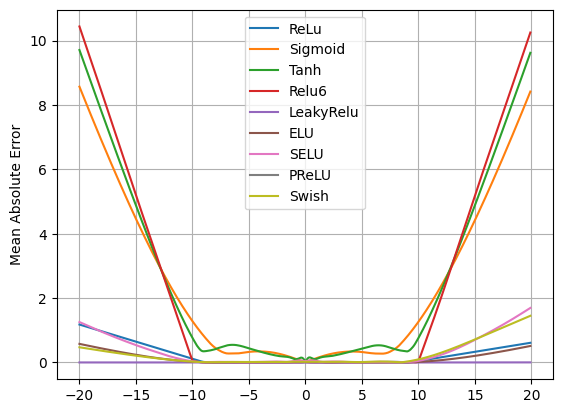

In [8]:
if __name__ == '__main__':
    ctx = mx.cpu()
    
    train_x = (-10,10)
    test_x = np.arange(-20, 20, 0.1)
    
    n_model = 20
    n_batch = 5000
    batch_size = 64
    
    activations = {
        'ReLu': mx.nd.relu,
        'Sigmoid': mx.nd.sigmoid,
        'Tanh': mx.nd.tanh,
        'Relu6': lambda x: mx.nd.clip(mx.nd.relu(x), 0, 6),
        'LeakyRelu': mx.nd.LeakyReLU,
        'ELU': nn.ELU(),
        'SELU': nn.SELU(),
        'PReLU': nn.PReLU(),
        'Swish': nn.Swish(),
    }
    
    legends = []
    for act in activations:
        test_err = np.zeros_like(test_x)
        
        for i in range(n_model):
            print("Train: %s %d/%d" % (act, i+1, n_model))
            net = Net(act=activations[act])
            net.collect_params().initialize(mx.init.Xavier(), ctx=ctx)
            
            train(net, train_x[0], train_x[1], batch_size, n_batch)
            err = evaluate(net, test_x)
            
            test_err += err
        plt.plot(test_x, test_err / n_model)
        legends.append(act)
        
    plt.legend(legends)
    plt.grid()
    plt.ylabel('Mean Absolute Error')
    plt.savefig('failure.png')
    plt.show()